# Diabetes Prediction with Logistic Regression

## 1. Importing Liabraries and observing the dataset

### Outcome 0 stands for a non diabetic patient and Outcome 1 stands for a diabetic patient

In [96]:
# 1. Importing Liabraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# 2. Loading the Dataset

diabeties_data=pd.read_csv('diabetes.csv')
diabeties_data

,Name,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Sex,Outcome
0,"Braund, Mr. Owen Harris",6,148,72,35,0,33.6,0.627,50.0,male,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,85,66,29,0,26.6,0.351,31.0,female,0
2,"Heikkinen, Miss. Laina",8,183,64,0,0,23.3,0.672,32.0,female,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,89,66,23,94,28.1,0.167,21.0,female,0
4,"Allen, Mr. William Henry",0,137,40,35,168,43.1,2.288,33.0,male,1
...,...,...,...,...,...,...,...,...,...,...,...
773,"Elias, Mr. Dibo",10,101,76,48,180,32.9,0.171,NaN,male,0
774,"Hocking, Mrs. Elizabeth (Eliza Needs)",2,122,70,27,0,36.8,0.340,NaN,female,0
775,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",5,121,72,23,112,26.2,0.245,NaN,male,0
776,"Tobin, Mr. Roger",1,126,60,0,0,30.1,0.349,NaN,male,1


In [21]:
# 3. Checking out the loaded dataset in varies ways 
diabeties_data.head()

,Name,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Sex,Outcome
0,"Braund, Mr. Owen Harris",6,148,72,35,0,33.6,0.627,50.0,male,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,85,66,29,0,26.6,0.351,31.0,female,0
2,"Heikkinen, Miss. Laina",8,183,64,0,0,23.3,0.672,32.0,female,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,89,66,23,94,28.1,0.167,21.0,female,0
4,"Allen, Mr. William Henry",0,137,40,35,168,43.1,2.288,33.0,male,1


In [22]:
# Length of the dataset
len(diabeties_data)

778

In [23]:
# checking the index range in the dataset
diabeties_data.index

RangeIndex(start=0, stop=778, step=1)

In [24]:
# Column Names
diabeties_data.columns

Index(['Name', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Sex', 'Outcome'],
      dtype='object')

In [25]:
# explaning each column 
diabeties_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      778 non-null    object 
 1   Pregnancies               778 non-null    int64  
 2   Glucose                   778 non-null    int64  
 3   BloodPressure             778 non-null    int64  
 4   SkinThickness             778 non-null    int64  
 5   Insulin                   778 non-null    int64  
 6   BMI                       778 non-null    float64
 7   DiabetesPedigreeFunction  778 non-null    float64
 8   Age                       768 non-null    float64
 9   Sex                       778 non-null    object 
 10  Outcome                   778 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 67.0+ KB


In [26]:
# datatypes of each column
diabeties_data.dtypes

Name                         object
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Sex                          object
Outcome                       int64
dtype: object

In [27]:
# describing the dataset
diabeties_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,768.000000,778.000000
mean,3.854756,120.890746,69.129820,20.511568,79.169666,31.998201,0.469932,33.240885,0.348329
std,3.372343,31.982414,19.261256,15.959988,114.833434,7.862240,0.330184,11.760232,0.476747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,23.000000,32.000000,0.369000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.600000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Analysing the Data

<AxesSubplot:xlabel='Outcome', ylabel='count'>

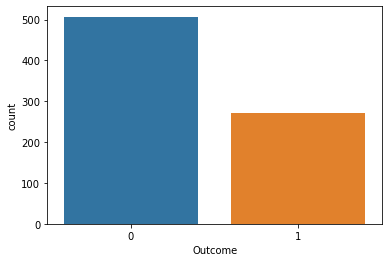

In [28]:
# 1. countplot of having diabities or not - it shows most of them are not having diabeties
sns.countplot(x='Outcome',data=diabeties_data)

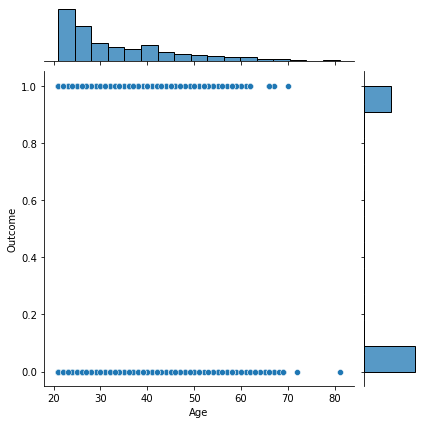

In [29]:
# 2. Jointplot which shows diabeties status vs Age - it represents that younger and middle age people are mostly getting into diabeties
sns.jointplot(x='Age',y='Outcome',data=diabeties_data)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

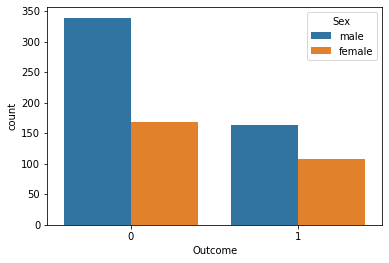

In [30]:
# 3. Male vs Female has diabities ?
sns.countplot(x='Outcome',data=diabeties_data,hue='Sex')

## 3. Data Preprocessing

In [31]:
# 1. check for null data - Copule of null items found in the Age column
diabeties_data.isna()

,Name,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Sex,Outcome
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
773,False,False,False,False,False,False,False,False,True,False,False
774,False,False,False,False,False,False,False,False,True,False,False
775,False,False,False,False,False,False,False,False,True,False,False
776,False,False,False,False,False,False,False,False,True,False,False


In [33]:
# 2. check how many values are null - 10 values are null in the Age column
diabeties_data.isna().sum()

Name                         0
Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                         10
Sex                          0
Outcome                      0
dtype: int64

<AxesSubplot:>

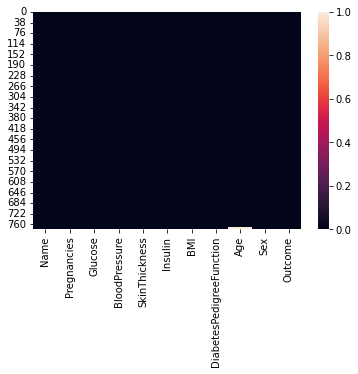

In [34]:
# 3. visualize null values - barely but can see it in the Age column
sns.heatmap(diabeties_data.isna())

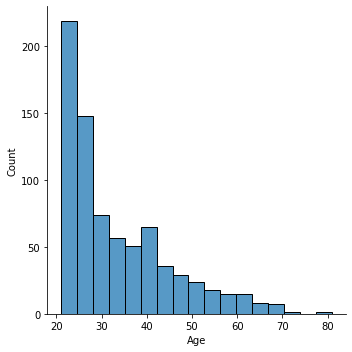

In [35]:
# 4. the distribution for the age column - seems like lot of younger people are there in the dataset
sns.displot(x='Age',data=diabeties_data)

In [36]:
# 5. Fill missing values in the Age column - filling with the mean value of the Age column
diabeties_data['Age'].fillna(diabeties_data['Age'].mean(),inplace=True)

In [37]:
# 6. varify weather there is any null values
diabeties_data['Age'].isna().sum()

0

In [39]:
# 7. check for the dataset back again - cannot see any empty Age values anymore
diabeties_data.tail()

,Name,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Sex,Outcome
773,"Elias, Mr. Dibo",10,101,76,48,180,32.9,0.171,33.240885,male,0
774,"Hocking, Mrs. Elizabeth (Eliza Needs)",2,122,70,27,0,36.8,0.340,33.240885,female,0
775,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",5,121,72,23,112,26.2,0.245,33.240885,male,0
776,"Tobin, Mr. Roger",1,126,60,0,0,30.1,0.349,33.240885,male,1
777,"Emanuel, Miss. Virginia Ethel",1,93,70,31,0,30.4,0.315,33.240885,female,0


In [40]:
# 8. check for non-numeric data
diabeties_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      778 non-null    object 
 1   Pregnancies               778 non-null    int64  
 2   Glucose                   778 non-null    int64  
 3   BloodPressure             778 non-null    int64  
 4   SkinThickness             778 non-null    int64  
 5   Insulin                   778 non-null    int64  
 6   BMI                       778 non-null    float64
 7   DiabetesPedigreeFunction  778 non-null    float64
 8   Age                       778 non-null    float64
 9   Sex                       778 non-null    object 
 10  Outcome                   778 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 67.0+ KB


In [41]:
# data types
diabeties_data.dtypes

Name                         object
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Sex                          object
Outcome                       int64
dtype: object

### At this point, 
#### 1. since "Name" column is a non-numeric type and it is not useful for this Machine learning model so we are gonna remove it.
#### 2. since "Sex" column is a non-numeric but it can be useful to train this machine learning mode, we are gonna convert it into numeric.


In [42]:
# 9. converting the "Sex" column into numeric value - 1 for male and 0 for female
gender=pd.get_dummies(diabeties_data['Sex'],drop_first=True)

In [43]:
# 10. adding a new column called "Gender" and add all the cnumerically converted age values
diabeties_data['Gender']=gender

In [44]:
# 11. check the dataset again
diabeties_data

,Name,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Sex,Outcome,Gender
0,"Braund, Mr. Owen Harris",6,148,72,35,0,33.6,0.627,50.000000,male,1,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,85,66,29,0,26.6,0.351,31.000000,female,0,0
2,"Heikkinen, Miss. Laina",8,183,64,0,0,23.3,0.672,32.000000,female,1,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,89,66,23,94,28.1,0.167,21.000000,female,0,0
4,"Allen, Mr. William Henry",0,137,40,35,168,43.1,2.288,33.000000,male,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
773,"Elias, Mr. Dibo",10,101,76,48,180,32.9,0.171,33.240885,male,0,1
774,"Hocking, Mrs. Elizabeth (Eliza Needs)",2,122,70,27,0,36.8,0.340,33.240885,female,0,0
775,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",5,121,72,23,112,26.2,0.245,33.240885,male,0,1
776,"Tobin, Mr. Roger",1,126,60,0,0,30.1,0.349,33.240885,male,1,1


In [46]:
# 12. Dropping the "Name" column which is not useful for this machine learning model
diabeties_data.drop(['Name'],axis=1,inplace=True)

In [47]:
# 13. checking for the data again
diabeties_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Sex,Outcome,Gender
0,6,148,72,35,0,33.6,0.627,50.000000,male,1,1
1,1,85,66,29,0,26.6,0.351,31.000000,female,0,0
2,8,183,64,0,0,23.3,0.672,32.000000,female,1,0
3,1,89,66,23,94,28.1,0.167,21.000000,female,0,0
4,0,137,40,35,168,43.1,2.288,33.000000,male,1,1
...,...,...,...,...,...,...,...,...,...,...,...
773,10,101,76,48,180,32.9,0.171,33.240885,male,0,1
774,2,122,70,27,0,36.8,0.340,33.240885,female,0,0
775,5,121,72,23,112,26.2,0.245,33.240885,male,0,1
776,1,126,60,0,0,30.1,0.349,33.240885,male,1,1


In [48]:
# 14. since we already have a gender column now, we need to remove the "Sex" column also
diabeties_data.drop(['Sex'],axis=1,inplace=True)

In [52]:
diabeties_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,148,72,35,0,33.6,0.627,50.000000,1,1
1,1,85,66,29,0,26.6,0.351,31.000000,0,0
2,8,183,64,0,0,23.3,0.672,32.000000,1,0
3,1,89,66,23,94,28.1,0.167,21.000000,0,0
4,0,137,40,35,168,43.1,2.288,33.000000,1,1
...,...,...,...,...,...,...,...,...,...,...
773,10,101,76,48,180,32.9,0.171,33.240885,0,1
774,2,122,70,27,0,36.8,0.340,33.240885,0,0
775,5,121,72,23,112,26.2,0.245,33.240885,0,1
776,1,126,60,0,0,30.1,0.349,33.240885,1,1


In [53]:
# 15. Rearranging the data columns - Getting the finalized dataset
new_columns = ["Pregnancies", "Glucose" , "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Gender","Outcome"]
diabeties_data = diabeties_data[new_columns]
diabeties_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Gender,Outcome
0,6,148,72,35,0,33.6,0.627,50.000000,1,1
1,1,85,66,29,0,26.6,0.351,31.000000,0,0
2,8,183,64,0,0,23.3,0.672,32.000000,0,1
3,1,89,66,23,94,28.1,0.167,21.000000,0,0
4,0,137,40,35,168,43.1,2.288,33.000000,1,1
...,...,...,...,...,...,...,...,...,...,...
773,10,101,76,48,180,32.9,0.171,33.240885,1,0
774,2,122,70,27,0,36.8,0.340,33.240885,0,0
775,5,121,72,23,112,26.2,0.245,33.240885,1,0
776,1,126,60,0,0,30.1,0.349,33.240885,1,1


## 4. Building the Model

In [54]:
# 1. seperating the dataset into dependent and independent variables
x=diabeties_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', "Age" , "Gender"]]
y=diabeties_data['Outcome']

In [55]:
y

0      1
1      0
2      1
3      0
4      1
      ..
773    0
774    0
775    0
776    1
777    0
Name: Outcome, Length: 778, dtype: int64

In [56]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Gender
0,6,148,72,35,0,33.6,0.627,50.000000,1
1,1,85,66,29,0,26.6,0.351,31.000000,0
2,8,183,64,0,0,23.3,0.672,32.000000,0
3,1,89,66,23,94,28.1,0.167,21.000000,0
4,0,137,40,35,168,43.1,2.288,33.000000,1
...,...,...,...,...,...,...,...,...,...
773,10,101,76,48,180,32.9,0.171,33.240885,1
774,2,122,70,27,0,36.8,0.340,33.240885,0
775,5,121,72,23,112,26.2,0.245,33.240885,1
776,1,126,60,0,0,30.1,0.349,33.240885,1


In [57]:
# 2. using train test split method in scikit learn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [83]:
# splitting it
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [84]:
# 3. importing LogisticRegression model in scikit learn
from sklearn.linear_model import LogisticRegression

In [85]:
# 4. Fitting the model
model=LogisticRegression()
model.fit(x_train,y_train)

E:\ML Projects\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
# 5. predict values for the testing data
predict=model.predict(x_test)
predict


array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [87]:
# 6. Get the prediction accuracy of the model - getting a prediction accuracy above 75% , which is good.
model.score(x_test,y_test)

0.7665369649805448

## 5. Testing the performance of the model

In [88]:
# 1. importing the confusion metrics liabrary from the sklearn
from sklearn.metrics import confusion_matrix

In [91]:
# 2. cheking the confusion metrix using pandas
pd.crosstab(y_test,predict,rownames=["Actual Label"], colnames=["Predicted Label"])


Predicted Label,0,1
Actual Label,,
0,140,23
1,37,57


In [92]:
# 3. importing the classification report in scikit learn
from sklearn.metrics import classification_report

In [93]:
# 4. using the classification report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       163
           1       0.71      0.61      0.66        94

    accuracy                           0.77       257
   macro avg       0.75      0.73      0.74       257
weighted avg       0.76      0.77      0.76       257



### Note 
#### 1. The ratio of accurately anticipated positive observations to the total predicted positive observations is known as precision.
#### 2. The ratio of accurately predicted positive observations to all observations in the actual class is known as recall.
#### 3. The weighted average of Precision and Recall is the F1 Score.

## 6. Improving the Model

### In order to more improve the accuracy of this model we are gonna tune the hyperparameters of this logistic regression model

In [94]:
# 1. 
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [95]:
# 2. importing GridSearch
from sklearn.model_selection import GridSearchCV

In [97]:
# 3. 
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [98]:
# 4. 
best_clf = clf.fit(x,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


E:\ML Projects\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "E:\ML Projects\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\ML Projects\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\ML Projects\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py", line

In [99]:
# 5.
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='newton-cg')

In [110]:
# 6. get the improved accuracy level
print (f'Accuracy - : {best_clf.score(x,y):.3f}')

Accuracy - : 0.780


## 7. Summery


### -----------------------------------------------------------------------------------------------------------------------------------------------------------
### 1. In this Logistic Regression project, we used a dataset from Kaggle which represents the features that can be used to predict whether somebody is a diabetic patient or not and that dataset is available under Kaggle as "Pima Indians Diabetes Database"
### 2. In the end according to the testing results, we got a prediction accuracy level of 76% for this model, which is good to improve the model further we need to provide more data into the dataset and we also can tryout this logistic regression analysis by using the other machine learning models available in the sci-kit-learn library too.
### 3. In the classification report, we can see good amounts in the precision which is 0.79 for predicting a patient as not a diabetic patient accurately and 0.71 for predicting a patient as a diabetic patient accurately.
### 4. Finally we improved the hyperparameters of the logistic regression model and it improved the model a furthermore and gave an accuracy level of 0.78% over the previous value, 0.77%.
### 5. Now we can deploy this logistic regression model for this diabetic patient identification scenario.

